<a href="https://colab.research.google.com/github/labonisarkar/IoT/blob/master/IoTNoteBook_Ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
# Colab library to upload files to notebook
!wget https://github.com/labonisarkar/IoT/raw/master/data/mainSimulationAccessTraces.zip

--2020-06-30 17:13:36--  https://github.com/labonisarkar/IoT/raw/master/data/mainSimulationAccessTraces.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/labonisarkar/IoT/master/data/mainSimulationAccessTraces.zip [following]
--2020-06-30 17:13:36--  https://raw.githubusercontent.com/labonisarkar/IoT/master/data/mainSimulationAccessTraces.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4424482 (4.2M) [application/zip]
Saving to: ‘mainSimulationAccessTraces.zip.2’

mainSimulationAcces 100%[===================>]   4.22M  21.1MB/s    in 0.2s    

2020-06-30 17:13:37 (21.1 MB/s) - ‘mainSimulati

In [89]:
!unzip mainSimulationAccessTraces.zip

Archive:  mainSimulationAccessTraces.zip
replace mainSimulationAccessTraces.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mainSimulationAccessTraces.csv  


# Importing Libraries

In [90]:
import matplotlib.pyplot as plt # Library for Data Visulization
import pandas as pd # Library for DataFrame 
import seaborn as sns #For Data Visulization

In [91]:
iot = pd.read_csv('mainSimulationAccessTraces.csv')

# Data PreProcessing
### Change the name of Iot Lables in Simpler form
Example: anomalous(DoSattack)  ---> DoS Attack

In [92]:
iot['normality'].value_counts()

normal                           347935
anomalous(DoSattack)               5780
anomalous(scan)                    1547
anomalous(malitiousControl)         889
anomalous(malitiousOperation)       805
anomalous(spying)                   532
anomalous(dataProbing)              342
anomalous(wrongSetUp)               122
Name: normality, dtype: int64

In [93]:
normality = iot['normality'].map({'normal': 'Normal', 'anomalous(DoSattack)':'DoS Attack', 'anomalous(scan)':'Scan',
       'anomalous(malitiousControl)':'Malitious Control', 'anomalous(malitiousOperation)' : 'Malitious Operation',
       'anomalous(spying)':'Spying', 'anomalous(dataProbing)':'Data Probing', 'anomalous(wrongSetUp)':'Wrong SetUp'})


In [94]:
iot['normality'] = normality
iot['normality'].value_counts()

Normal                 347935
DoS Attack               5780
Scan                     1547
Malitious Control         889
Malitious Operation       805
Spying                    532
Data Probing              342
Wrong SetUp               122
Name: normality, dtype: int64

# Visualize Missing Values
The Missing values are shown in block for all the column in the plot

sourceID                        0
sourceAddress                   0
sourceType                      0
sourceLocation                  0
destinationServiceAddress       0
destinationServiceType          0
destinationLocation             0
accessedNodeAddress             0
accessedNodeType              148
operation                       0
value                        2050
timestamp                       0
normality                       0
dtype: int64


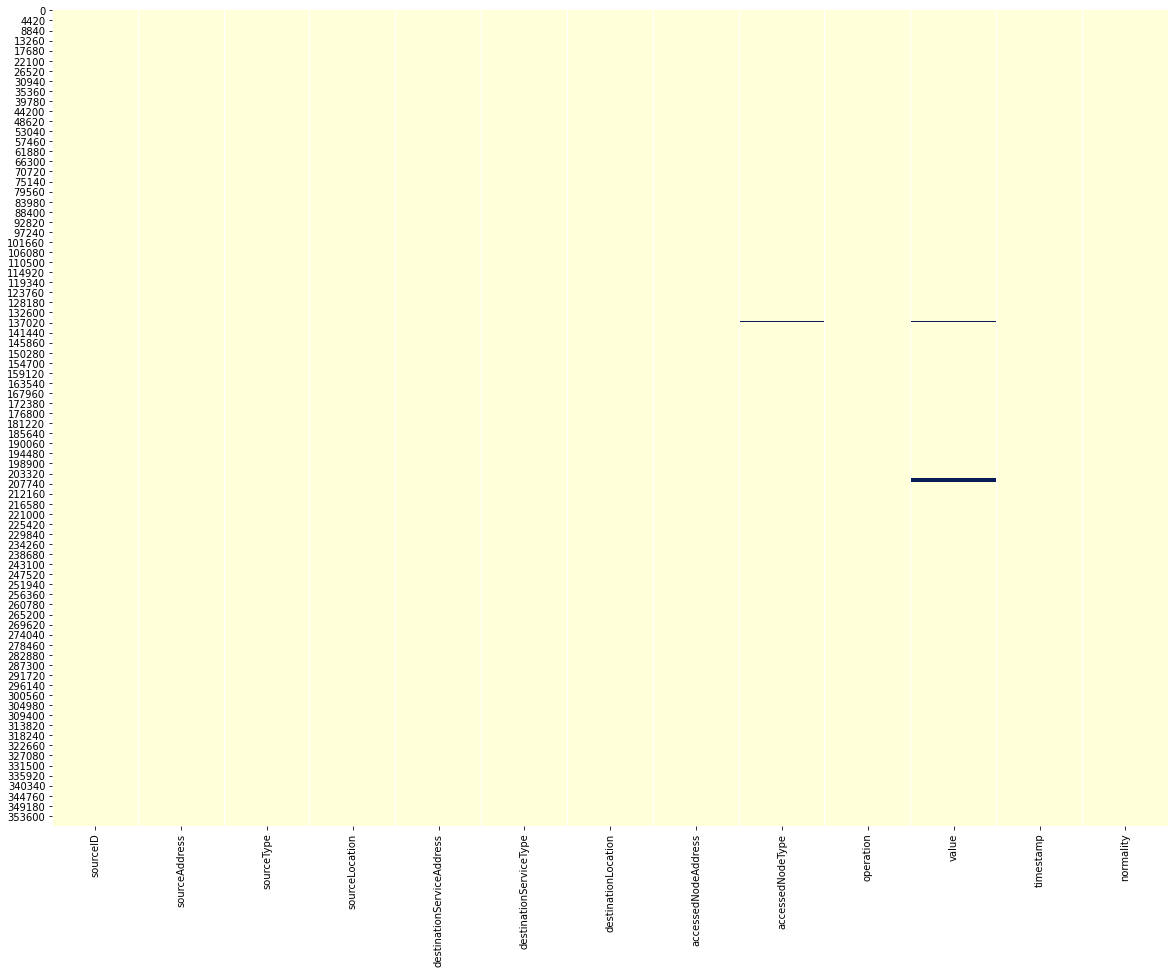

In [95]:
#Visualize Missing Values
plt.subplots(figsize=(20,15))
sns.heatmap(iot.isnull(), cbar=False, cmap="YlGnBu")
print(iot.isnull().sum())

In [96]:
iot.isnull().sum()

sourceID                        0
sourceAddress                   0
sourceType                      0
sourceLocation                  0
destinationServiceAddress       0
destinationServiceType          0
destinationLocation             0
accessedNodeAddress             0
accessedNodeType              148
operation                       0
value                        2050
timestamp                       0
normality                       0
dtype: int64

# comment
- The Result shows The Columns **Values** and **accessedNodeType** have 2050 and 148 missing values
- The missing values are then replaced by fill forword method for values and accessedNodeType with '/Unknown'

sourceID                     0
sourceAddress                0
sourceType                   0
sourceLocation               0
destinationServiceAddress    0
destinationServiceType       0
destinationLocation          0
accessedNodeAddress          0
accessedNodeType             0
operation                    0
value                        0
timestamp                    0
normality                    0
dtype: int64


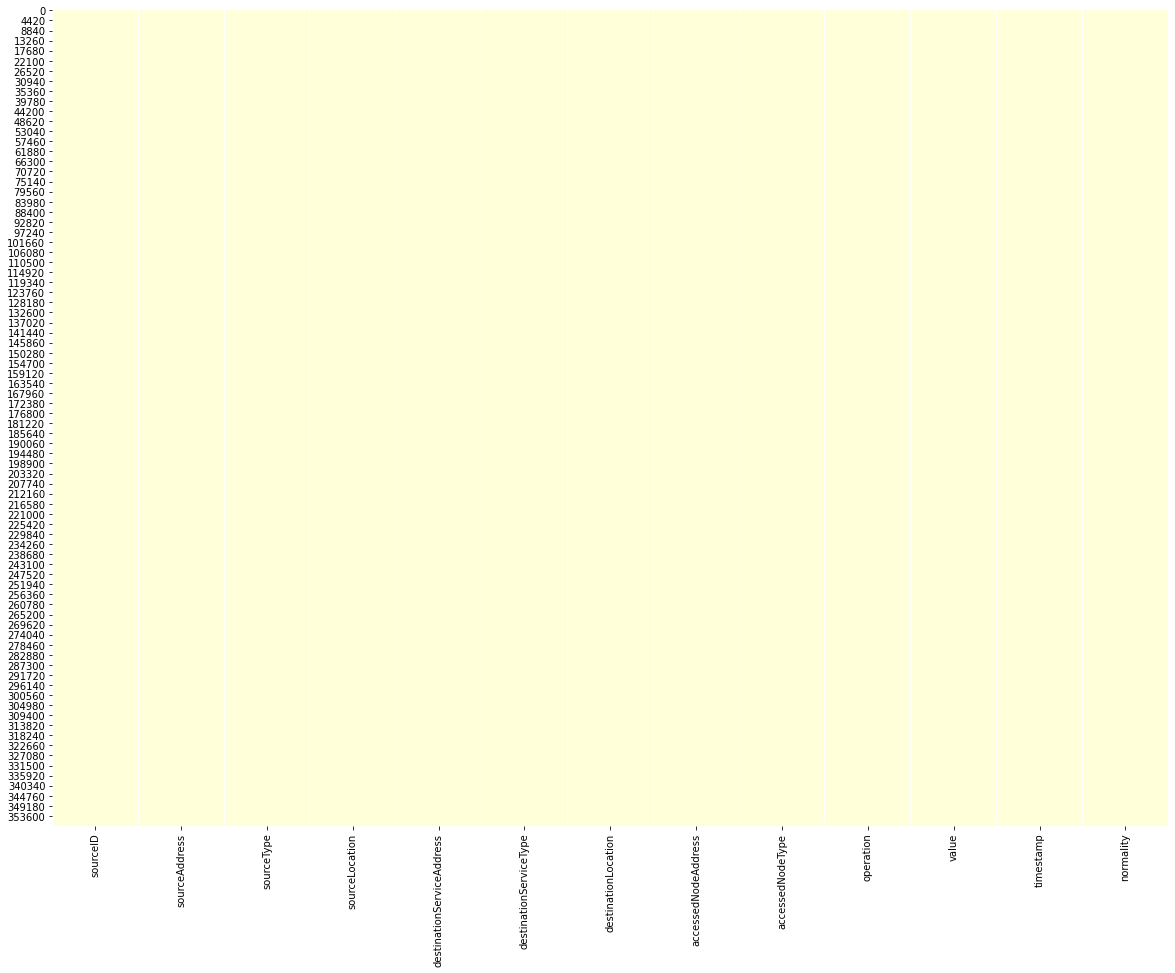

In [97]:

iot['value'].fillna( method ='ffill', inplace = True) 
iot['accessedNodeType'] = iot['accessedNodeType'].fillna(value='/Unknown')

#Visualize Missing Values
plt.subplots(figsize=(20,15))
sns.heatmap(iot.isnull(), cbar=False, cmap="YlGnBu")
print(iot.isnull().sum())

# Ploting the Type of Attacks

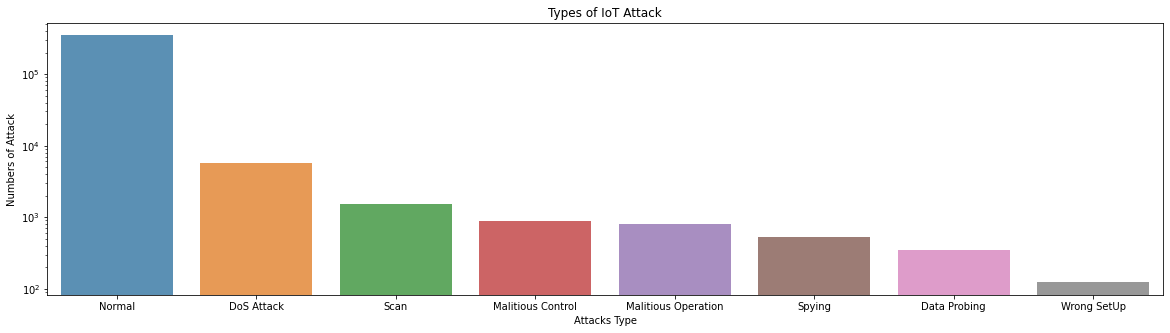

In [98]:
#ploting the bar graph of Types of 
plt.figure(figsize=(20,5))
attack_count = iot['normality'].value_counts()
g = sns.barplot(attack_count.index,attack_count.values,alpha=0.8)
g.set_yscale("log")
plt.title('Types of IoT Attack')
plt.xlabel('Attacks Type')
plt.ylabel('Numbers of Attack')
plt.show()

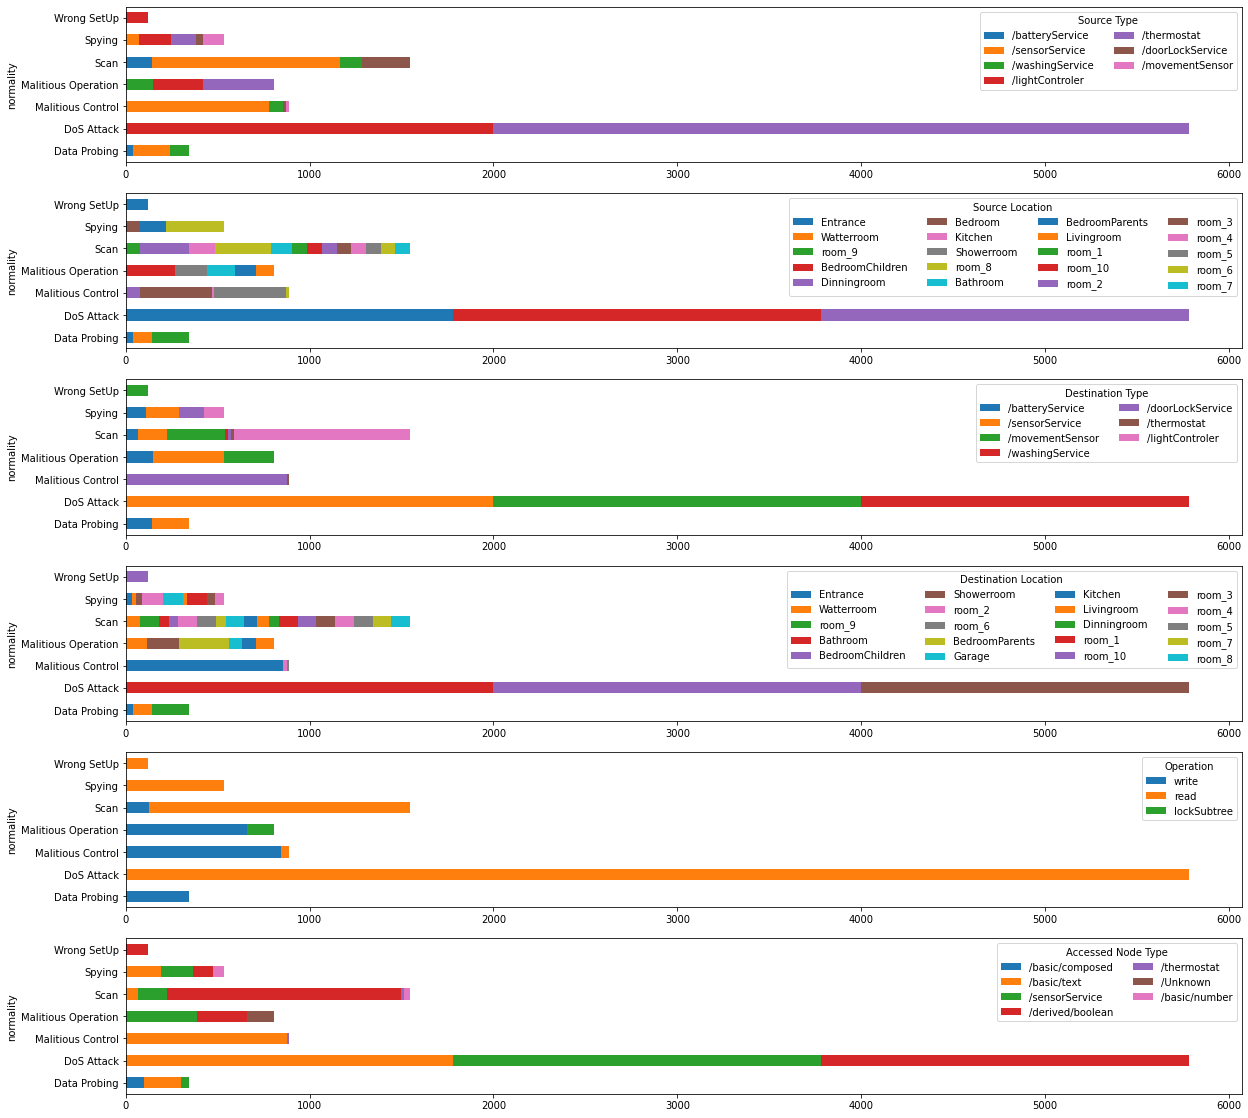

In [99]:

fig = plt.figure()

# Divide the figure into a 4x1 grid, and give me the first section
ax1 = fig.add_subplot(611)

# Divide the figure into a 4x1 grid, and give me the second section
ax2 = fig.add_subplot(612)

# Divide the figure into a 4x1 grid, and give me the first section
ax3 = fig.add_subplot(613)

# Divide the figure into a 4x1 grid, and give me the second section
ax4 = fig.add_subplot(614)

# Divide the figure into a 4x1 grid, and give me the first section
ax5 = fig.add_subplot(615)

# Divide the figure into a 4x1 grid, and give me the second section
ax6 = fig.add_subplot(616)


iot.groupby(['normality','sourceType'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax1)
iot.groupby(['normality','sourceLocation'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax2)
iot.groupby(['normality','destinationServiceType'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax3)
iot.groupby(['normality','destinationLocation'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax4)
iot.groupby(['normality','operation'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax5)
iot.groupby(['normality','accessedNodeType'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax6)
ax1.legend(ncol=2,title='Source Type')
ax2.legend(ncol=4,title='Source Location')
ax3.legend(ncol=2,title='Destination Type')
ax4.legend(ncol=4,title='Destination Location')
ax5.legend(title='Operation')
ax6.legend(ncol=2,title='Accessed Node Type')

# Data Pre Processing
- The Value Columns show some anomalies in the data, The next steps we cleans the valus data and replace
- Example : none to 0 , false to 0 , true to 1 , twenty to 20
- Next we change the data type with string to numaric 

In [100]:
iot[['value']][iot['value'].str.isalnum()]['value'].value_counts()

1         57066
0         50293
false     25974
true      14540
7         10038
10         9636
6          8540
5          8494
2          8444
4          8437
9          8433
8          8430
3          8428
twenty      200
none        106
Name: value, dtype: int64

In [101]:
#Map the Non-Numeric Value to Corresponding values
value_map = {'none':'0','false':'0','true':'1','twenty':'20'}
iot['value'] = iot['value'].map(value_map).fillna(iot['value'])

In [102]:
# covert the data values to numeric
iot['value'] = pd.to_numeric(iot['value'], errors='coerce')

In [103]:
print(iot.isnull().sum())

sourceID                      0
sourceAddress                 0
sourceType                    0
sourceLocation                0
destinationServiceAddress     0
destinationServiceType        0
destinationLocation           0
accessedNodeAddress           0
accessedNodeType              0
operation                     0
value                        11
timestamp                     0
normality                     0
dtype: int64


In [104]:
iot.dropna(inplace=True)
print(iot.isnull().sum())

sourceID                     0
sourceAddress                0
sourceType                   0
sourceLocation               0
destinationServiceAddress    0
destinationServiceType       0
destinationLocation          0
accessedNodeAddress          0
accessedNodeType             0
operation                    0
value                        0
timestamp                    0
normality                    0
dtype: int64


## Feature Genaration

In [105]:
#Conver columns to type to category
def to_category(dataframe,columns=[],type = 'None'):
    if type == 'object':
        columns = list(dataframe.select_dtypes(type).dtypes.index)        
    return dataframe[columns].apply(lambda x: x.astype('category'))

# Function OneHot Coding:
def convert_to_onehot(dataframe,feature_list,drop_first=True):
    """Covert all columns in the list using One Hot Method"""
    res = pd.DataFrame(index=dataframe.index)
    for feature in feature_list:
        dummies = pd.get_dummies(dataframe[[feature]])
        res = pd.concat([res,dummies],axis=1)
    if not drop_first:
        res = pd.concat([dataframe,res],axis=1)
    return res


#label Encoder for categorical data
def label_encoder(dataframe,columns,drop_first=True,prefix='_label'):
    """convert categorical data with label encoder"""
    from sklearn.preprocessing import LabelEncoder
    res = pd.DataFrame(index=dataframe.index)
    for col in columns:
        # creating instance of labelencoder
        labelencoder = LabelEncoder()
        res[col+prefix] = labelencoder.fit_transform(dataframe[col])
    if not drop_first:
        res = pd.concat([dataframe,res],axis=1)
    return res

In [106]:
iot.dtypes

sourceID                      object
sourceAddress                 object
sourceType                    object
sourceLocation                object
destinationServiceAddress     object
destinationServiceType        object
destinationLocation           object
accessedNodeAddress           object
accessedNodeType              object
operation                     object
value                        float64
timestamp                      int64
normality                     object
dtype: object

In [107]:
columns = to_category(iot,type = 'object').columns
iot[columns] = to_category(iot,type = 'object')
iot.dtypes

sourceID                     category
sourceAddress                category
sourceType                   category
sourceLocation               category
destinationServiceAddress    category
destinationServiceType       category
destinationLocation          category
accessedNodeAddress          category
accessedNodeType             category
operation                    category
value                         float64
timestamp                       int64
normality                    category
dtype: object

In [108]:
iot.describe()

,value,timestamp
count,3.579410e+05,3.579410e+05
mean,2.447954e+09,1.520078e+12
std,6.097456e+10,2.465573e+07
min,0.000000e+00,1.520032e+12
25%,1.000000e+00,1.520057e+12
50%,5.000000e+00,1.520080e+12
75%,1.982230e+01,1.520099e+12
max,1.521225e+12,1.520118e+12


In [109]:
iot.select_dtypes('category').describe()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,normality
count,357941,357941,357941,357941,357941,357941,357941,357941,357941,357941,357941
unique,84,89,8,21,85,8,21,170,13,4,8
top,washingmachine1,/agent6/washingmachine1,/lightControler,Garage,/agent11/battery4,/sensorService,Garage,/agent11/battery4/charge,/sensorService,read,Normal
freq,17908,17908,135775,39499,27643,130313,57100,19031,130155,248061,347924


In [110]:
#unique_values = iot.select_dtypes('category').describe().loc['unique',:].to_frame()
#label_col = unique_values[unique_values > 21].dropna().index
#hot_col = unique_values[unique_values <= 21].dropna().index

iot_feature_col = ['sourceType', 'sourceLocation', 'destinationServiceType', 'destinationLocation', 'accessedNodeType', 'operation','sourceID', 'sourceAddress', 'destinationServiceAddress', 'accessedNodeAddress']
target = ['normality']

In [111]:
iot.drop('timestamp',axis=1,inplace=True)

In [112]:
iot_feature = pd.concat([label_encoder(iot,iot_feature_col),iot[['value']]],axis=1)

In [113]:
iot[['normality']]

,normality
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal
...,...
357947,Normal
357948,Normal
357949,Normal
357950,Normal


In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(iot_feature)

from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(iot['normality'].values).reshape(-1,1)

In [147]:
attack_class = list(labelencoder_y.classes_)
list(labelencoder_y.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7]))

['Data Probing',
 'DoS Attack',
 'Malitious Control',
 'Malitious Operation',
 'Normal',
 'Scan',
 'Spying',
 'Wrong SetUp']

In [116]:
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])
y[1]

array([0, 0, 0, 0, 1, 0, 0, 0])

# Machine Learning

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.multiclass import OneVsRestClassifier

In [62]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 123)

In [138]:
# ploting Auc Ruc Curve
def add_results(name,y_test,y_pred):
  results[name] = {}
  results[name]['Accuracy Score'] = round(accuracy_score(y_test,y_pred),4)
  results[name]['Precision Score'] = round(precision_score(y_test,y_pred,average='weighted'),4)
  results[name]['Recall Score'] = round(recall_score(y_test,y_pred,average='weighted'),4)
  results[name]['F1 Score'] = round(f1_score(y_test,y_pred,average='weighted'),4)
  print(results[name])
  return results

In [201]:
#ROC AUC plot

from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def plot_roc_curve(y_score,y_test,n_classes = 8,name="RoC Curve"):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  attack_class = ['D. Prob', 'DoS', 'Mal. Cont.','Mal. Op.', 'Normal', 'Scan', 'Spying', 'W. SetUp']
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  #print(roc_auc)
  #plot
  classes = attack_class
  plt.figure(figsize=(7,6))
  ax=plt.subplot(111)
  colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xticks(fontsize=11,weight='bold')
  plt.yticks(fontsize=11,weight='bold')
  plt.setp(ax.spines.values(), linewidth=2)
  ax.xaxis.set_tick_params(width=2)
  ax.yaxis.set_tick_params(width=2)
  plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
  plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
  plt.legend(loc="lower right")
  plt.savefig(name)


In [141]:
from sklearn.metrics import classification_report

In [168]:
# All Machine Learning Code Results
results = {}

# K Nearest Neighbor(KNN)

In [192]:
name = "KNeighborsClassifier"

from sklearn.neighbors import KNeighborsClassifier
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors= 8))

knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)

add_results(name,y_test,y_pred)

{'Accuracy Score': 0.9944, 'Precision Score': 0.9944, 'Recall Score': 0.9944, 'F1 Score': 0.9938}


{'KNeighborsClassifier': {'Accuracy Score': 0.9944,
  'F1 Score': 0.9938,
  'Precision Score': 0.9944,
  'Recall Score': 0.9944}}

In [193]:
print(classification_report(y_test, y_pred,target_names=attack_class ))

                     precision    recall  f1-score   support

       Data Probing       1.00      1.00      1.00        67
         DoS Attack       1.00      0.65      0.78      1121
  Malitious Control       1.00      1.00      1.00       187
Malitious Operation       1.00      1.00      1.00       150
             Normal       0.99      1.00      1.00     69630
               Scan       0.99      1.00      1.00       321
             Spying       0.99      1.00      0.99        91
        Wrong SetUp       1.00      1.00      1.00        22

          micro avg       0.99      0.99      0.99     71589
          macro avg       1.00      0.96      0.97     71589
       weighted avg       0.99      0.99      0.99     71589
        samples avg       0.99      0.99      0.99     71589



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [195]:
y_score = knn.predict_proba(X_test)

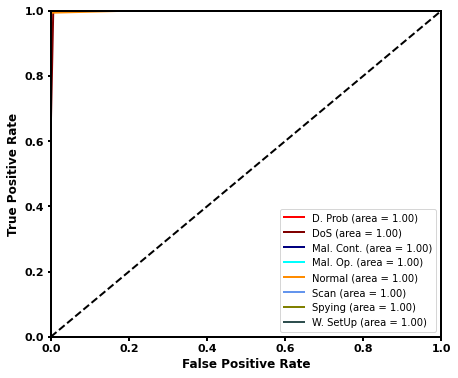

In [202]:
plot_roc_curve(y_score,y_test)

In [191]:
from sklearn.metrics import roc_curve, auc
fpr_svc = dict()
tpr_svc = dict()
roc_auc_svc = dict()
for i in range(8):
    fpr_svc[i], tpr_svc[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc_svc[i] = auc(fpr_svc[i], tpr_svc[i])

ValueError: ignored

In [190]:
y_score[:, 1]

TypeError: ignored

In [179]:
y_score = knn.predict_proba(X_test)
from scipy import interp
from itertools import cycle
n_classes = 8
lw = 2
classes = attack_class
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_svc[i], tpr_svc[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_svc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig(name)

TypeError: ignored

# Decision Tree

In [155]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
tree.fit(X_train,y_train)
y_pred  = tree.predict(X_test)

add_results("DecisionTreeClassifier",y_test,y_pred)

{'Accuracy Score': 0.9937, 'Precision Score': 0.9935, 'Recall Score': 0.9937, 'F1 Score': 0.993}


{'DecisionTreeClassifier': {'Accuracy Score': 0.9937,
  'F1 Score': 0.993,
  'Precision Score': 0.9935,
  'Recall Score': 0.9937},
 'KNeighborsClassifier': {'Accuracy Score': 0.9944,
  'F1 Score': 0.9938,
  'Precision Score': 0.9944,
  'Recall Score': 0.9944}}

In [156]:
print(classification_report(y_test, y_pred,target_names=attack_class ))

                     precision    recall  f1-score   support

       Data Probing       1.00      1.00      1.00        67
         DoS Attack       0.97      0.65      0.78      1121
  Malitious Control       1.00      1.00      1.00       187
Malitious Operation       1.00      1.00      1.00       150
             Normal       0.99      1.00      1.00     69630
               Scan       1.00      1.00      1.00       321
             Spying       0.95      0.64      0.76        91
        Wrong SetUp       1.00      1.00      1.00        22

          micro avg       0.99      0.99      0.99     71589
          macro avg       0.99      0.91      0.94     71589
       weighted avg       0.99      0.99      0.99     71589
        samples avg       0.99      0.99      0.99     71589



## Support Vector Machine

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(warm_start=True,n_estimators=10)
rfc.fit(X_train, y_train) 
y_pred = rfc.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred,average='weighted')))
print('Recall Score : ' + str(recall_score(y_test,y_pred,average='weighted')))
print('F1 Score : ' + str(f1_score(y_test,y_pred,average='weighted')))

Accuracy Score : 0.9940865872624158
Precision Score : 0.993991705237306
Recall Score : 0.9940865872624158
F1 Score : 0.9934829055703668


# SVM : Linear SVC

In [65]:
from sklearn.svm import LinearSVC
lsvc = OneVsRestClassifier(LinearSVC())

lsvc.fit(X_train, y_train)
y_pred_lsvc = lsvc.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_lsvc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_lsvc,average='weighted')))
print('Recall Score : ' + str(recall_score(y_test,y_pred_lsvc,average='weighted')))
print('F1 Score : ' + str(f1_score(y_test,y_pred_lsvc,average='weighted')))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

Accuracy Score : 0.9818687228484823
Precision Score : 0.9812069872665274
Recall Score : 0.9868834597494028
F1 Score : 0.9820133988432644


In [158]:
y_score_lsvc = lsvc.decision_function(X_test)

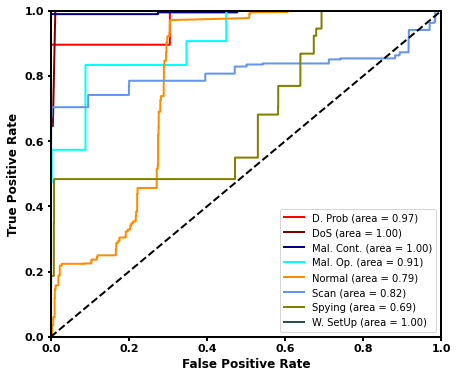

In [167]:
plot_roc_curve(y_score_lsvc,y_test)

In [69]:
from sklearn.metrics import roc_curve, auc
fpr_svc = dict()
tpr_svc = dict()
roc_auc_svc = dict()
for i in range(8):
    fpr_svc[i], tpr_svc[i], _ = roc_curve(y_test[:, i], y_score_svc[:, i])
    roc_auc_svc[i] = auc(fpr_svc[i], tpr_svc[i])


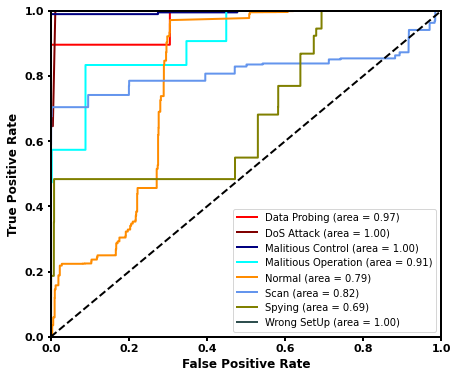

In [180]:
from scipy import interp
from itertools import cycle
n_classes = 8
lw = 2
classes = attack_class
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_svc[i], tpr_svc[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_svc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_SVM")

In [152]:
roc_auc_svc

{0: 0.9681223228673611,
 1: 0.9969925866351317,
 2: 0.995969420410489,
 3: 0.9093062146259979,
 4: 0.7918540734196511,
 5: 0.8153167885269014,
 6: 0.6921602971142818,
 7: 1.0}